In [88]:
import requests
import json
import time

import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from datetime import datetime
from io import BytesIO
from PIL import Image
from pprint import pprint
from attrdict import AttrDict

### Corgi parsing 

In [113]:
def parse_hashtag(tag_name, limit=None, images_folder=None, sleep=None, verbose=True):
    next_url = f"https://www.instagram.com/explore/tags/{tag_name}/?__a=1"
    has_next_page = True
    df = pd.DataFrame()
    
    while has_next_page:
        response = requests.get(next_url).text
        response = AttrDict(json.loads(response))
        
        has_next_page = response.graphql.hashtag.edge_hashtag_to_media.page_info.has_next_page
        end_cursor = response.graphql.hashtag.edge_hashtag_to_media.page_info.end_cursor
        next_url = f"https://www.instagram.com/explore/tags/{tag_name}/?__a=1&max_id={end_cursor}"
        
        nodes = response.graphql.hashtag.edge_hashtag_to_media.edges
        for node in nodes:
            try:
                info = {}
                info["shortcode"] = node.node["shortcode"]
                info["typename"] = node.node["__typename"]
                info["display_url"] = node.node["display_url"]
                info["liked_by"] = node.node["edge_liked_by"]["count"]
                info["owner_id"] = node.node["owner"]["id"]
                info["taken_at_timestamp"] = node.node["taken_at_timestamp"]
                info["accessibility_caption"] = node.node["accessibility_caption"]
                info["parsed_at_timestamp"] = datetime.now().timestamp()
                
                if len(node.node["edge_media_to_caption"]["edges"]) > 0:
                    info["caption"] = node.node["edge_media_to_caption"]["edges"][0]["node"]["text"]

                df = df.append(info, ignore_index=True)

                if images_folder:
                    raw = requests.get(info["display_url"])
                    image = Image.open(BytesIO(raw.content))
                    image.save(images_folder / (info["shortcode"] + ".png"))
                    
                if verbose:
                    print(f"parsed image #{len(df)}:{node.node['shortcode']}")
    
            except Exception as err:
                pass

            if limit and len(df) >= limit:
                return df
    
        if sleep:
            time.sleep(sleep)
            
    return df

In [89]:
data_folder = Path("data/corgi")
images_folder = data_folder / "images"

In [115]:
%%time
parse_hashtag("corgi", 100, images_folder)

parsed image #1:B-2XNuEpJst
parsed image #2:B-2XMAbgTy0
parsed image #3:B-2XIKHKKQ1
parsed image #4:B-2XGzZJx4i
parsed image #5:B-2XFZfpV7p
parsed image #6:B-2XFMlJdld
parsed image #7:B-2XAN1pQCh
parsed image #8:B-2WarMpLYg
parsed image #9:B-2W9oKp6Jv
parsed image #10:B-2W7WKgLtv
parsed image #11:B-2W7WvoDnk
parsed image #12:B-2W46hpzQ6
parsed image #13:B-2W0I4jc1d
parsed image #14:B-2WzE_D86w
parsed image #15:B-2WxvmJ09h
parsed image #16:B-2Wsl2hk_H
parsed image #17:B-2WsIpHTi8
parsed image #18:B-2WggHpMG3
parsed image #19:B-2WrLXpH4u
parsed image #20:B-2WVg6po7H
parsed image #21:B-2WmlHJMdu
parsed image #22:B-2WmQAp4it
parsed image #23:B-2WlQMg_q-
parsed image #24:B-2WiD9DUCe
parsed image #25:B-2WiAwHCmj
parsed image #26:B-2WZaupVsX
parsed image #27:B-2Wf--BJap
parsed image #28:B-2Wc-LpQn0
parsed image #29:B-2Wcmsp5WQ
parsed image #30:B-2WcIbpb26
parsed image #31:B-2WZcHJ_CN
parsed image #32:B-2WZVrgN4I
parsed image #33:B-2WZOYJGwo
parsed image #34:B-2WYyJBiCQ
parsed image #35:B-2WYu

accessibility_caption  \
0   Photo by Hi, I’m Louie on April 11, 2020. Imag...   
1                                                None   
2   Photo by Salomé Nau on April 11, 2020. Image m...   
3   Photo by Kaze the corgi on April 11, 2020. Ima...   
4   Photo by Callie the Corgi on April 11, 2020. I...   
..                                                ...   
95                                               None   
96  Photo by 👻jonnakatriinaa on April 11, 2020. Im...   
97                 Photo by Oliver on April 11, 2020.   
98  Photo by Lija Korgic on April 11, 2020. Image ...   
99  Photo by Bella Jo on April 11, 2020. Image may...   

                                              caption  \
0   In honor of national pet day, this is my pet h...   
1                                        Tubbs #corgi   
2   J’en connais 2 qui sont contents qu’on soit à ...   
3   I'm growing up so fast! \n#kazecorgi\n\n#corgi...   
4   Hi world! I'm kinda nervous leaving my breeder...   
..                                                ...   
95  For the people who ask me if I “shed much”. #c...   
96                       hyvää pääsiäistä 😄\n\n#corgi   
97  Life’s ruff but at least mom has fuzzy sweater...   
98  Srecan Rodjendan Patricia! 🎂🎉🎁 #corgi #corgiso...   
99  The look mama gives me when she found out I pe...   

                                          display_url  liked_by     owner_id  \
0   https://instagram.fdnk1-1.fna.fbcdn.net/v/t51....       0.0  20998195313   
1   https://instagram.fdnk1-1.fna.fbcdn.net/v/t51....       0.0   6795082095   
2   https://instagram.fdnk1-1.fna.fbcdn.net/v/t51....       2.0   2894202165   
3   https://instagram.fdnk1-2.fna.fbcdn.net/v/t51....       0.0  30040982073   
4   https://instagram.fdnk1-2.fna.fbcdn.net/v/t51....       0.0  32489763589   
..                                                ...       ...          ...   
95  https://instagram.fdnk1-2.fna.fbcdn.net/v/t51....       1.0   4072101452   
96  https://instagram.fdnk1-2.fna.fbcdn.net/v/t51....       8.0  10611667824   
97  https://instagram.fdnk1-1.fna.fbcdn.net/v/t51....       0.0  33000304240   
98  https://instagram.fdnk1-2.fna.fbcdn.net/v/t51....       2.0  28082247246   
99  https://instagram.fdnk1-1.fna.fbcdn.net/v/t51....       0.0  31715321713   

    parsed_at_timestamp    shortcode  taken_at_timestamp      typename  
0          1.586632e+09  B-2XNuEpJst        1.586627e+09    GraphImage  
1          1.586632e+09  B-2XMAbgTy0        1.586627e+09  GraphSidecar  
2          1.586632e+09  B-2XIKHKKQ1        1.586627e+09  GraphSidecar  
3          1.586632e+09  B-2XGzZJx4i        1.586627e+09    GraphImage  
4          1.586632e+09  B-2XFZfpV7p        1.586627e+09    GraphImage  
..                  ...          ...                 ...           ...  
95         1.586632e+09  B-2WZaupVsX        1.586627e+09    GraphVideo  
96         1.586632e+09  B-2Wf--BJap        1.586627e+09  GraphSidecar  
97         1.586632e+09  B-2Wc-LpQn0        1.586627e+09    GraphImage  
98         1.586632e+09  B-2Wcmsp5WQ        1.586627e+09    GraphImage  
99         1.586632e+09  B-2WcIbpb26        1.586627e+09    GraphImage  

[100 rows x 9 columns]

In [66]:
# &max_id=<value>
url = "https://www.instagram.com/explore/tags/corgi/?__a=1"
text = requests.get(url).text

B-2XNuEpJst
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/92875141_662531327841580_7701226488714259888_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=P27z7fRCnwYAX-aH2ci&oh=d1612c1ab27377e0a6f81e2ad46c8f5e&oe=5EBBE511
In honor of national pet day, this is my pet hooman. Her name is Kim, she’s 175 (or 25 in people years haha) and Ive trained her to give the best treats and cuddles. #nationalpetday🐾 .
.
.
.
.
.
.
. #corgilife #pembrokecorgi #corgilove #corgi #corgisofinstagram #corgipuppy #corgination #corgiplanet #corgisgonnacorg #corgiaddict #corgisofbuffalo #dogsofbuffalo #dogs #dogsofinsta #716dogs #dogsof716 #corgi_nation #portraitmode #cutedog #followforfollow #follow4follow #f4f  #followforfollowback
0
20998195313
2020-04-11 20:44:31
Photo by Hi, I’m Louie on April 11, 2020. Image may contain: 1 person, dog and outdoor


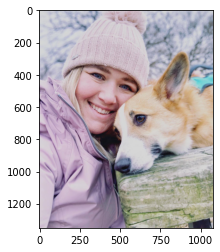

B-2XMAbgTy0
GraphSidecar
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/92696581_643561179769652_6372022402197421899_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=108&_nc_ohc=94kCKYQyKXQAX9TFZbp&oh=5c95c8892d5885bfc1c1a4a662e11f55&oe=5E943F23
Tubbs #corgi
0
6795082095
2020-04-11 20:44:17
None


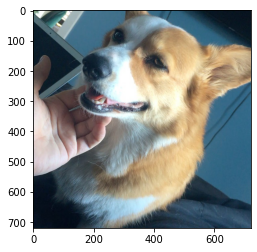

B-2XIKHKKQ1
GraphSidecar
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/93495069_518913482348402_2791979741418358824_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=102&_nc_ohc=xEO_2Gtbx14AX8btsJC&oh=6b52f0002408946ec1d1a203791cb864&oe=5EBC43A5
J’en connais 2 qui sont contents qu’on soit à la maison toute la journée ! 😻🥰#catsofinstagram #corgi #corgilove #cats #stayhome
2
2894202165
2020-04-11 20:43:46
Photo by Salomé Nau on April 11, 2020. Image may contain: dog and indoor


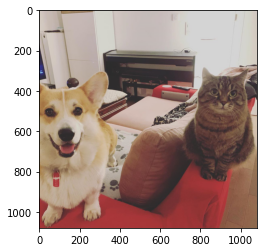

B-2XGzZJx4i
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/92579807_221249298945531_585227295969174627_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=103&_nc_ohc=KvFf8n2G4jUAX-Y3v7r&oh=d5a559ecf30f52c7281bb9811256f753&oe=5EBCC7C7
I'm growing up so fast! 
#kazecorgi

#corgi #corgisofinstagram #dogsofinstagram #corgination #corgipuppy #corgilove #dog #corgilife #puppy #pembrokewelshcorgi #corgis #corgiworld #corgigram #corgicommunity #dogs #corgibutt #corgifeed #welshcorgi #corgiaddict #puppiesofinstagram #corgistagram #corgipuppies #corgilover #puppylove #corginstagram #dogstagram #12weeksold
0
30040982073
2020-04-11 20:43:35
Photo by Kaze the corgi on April 11, 2020. Image may contain: dog, possible text that says '8 weeks 12 weeks'


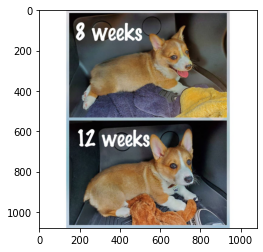

B-2XFZfpV7p
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/92813663_118283139827407_5663832070212633707_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=107&_nc_ohc=EOy-6dzhlaUAX9LekyH&oh=9ee992e517ca7d1714c23c96c5f74836&oe=5EBA2E58
Hi world! I'm kinda nervous leaving my breeder but my new human seems nice! #corgi #corgisofinstagram #puppy #puppylove
0
32489763589
2020-04-11 20:43:23
Photo by Callie the Corgi on April 11, 2020. Image may contain: dog


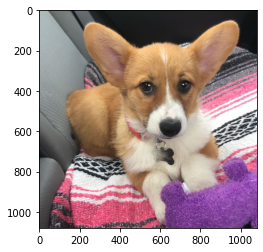

B-2XFMlJdld
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/92822622_624687471420427_1599759444557520353_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=107&_nc_ohc=0kO7fXl-QiMAX_9euBg&oh=708bfd7c4ebf6cbf3602b4c4699ae44c&oe=5EBD1DC3
#corgi #stayhome #corgigirl #dog #pet #girl #stayhome #dogpet #love #foxi #quarantine #lovemyhuman #follow #like #staysafe #coronavirus #ears #cute #face #cuteface #cuteears #dogface #dogcutieface #foxithecorgi
2
32161064263
2020-04-11 20:43:21
Photo by 𝙁𝙤𝙭𝙞 in Home Sweet Home!!! <3. Image may contain: dog


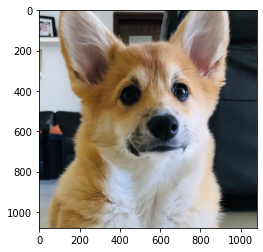

B-2XAN1pQCh
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/93189888_207841273994843_9031273046068406291_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=111&_nc_ohc=C97eHJH-VLEAX8UMzQA&oh=050409d9d7ee287f4039ab4bfc9edb1f&oe=5EB9E9B3
Sleepy brothers.. and Tango 😂 #roach #khaldoggo #tango #brothers #furbaby #dogmom #dogdad #dogsofinstagram #puppiesofinstagram #puppylove #corgi #corgisofinstagram #blacklab #labsofinstagram #bordercollie #bordercolliesofinstagram
0
31957293485
2020-04-11 20:42:41
Photo by Khal and Tango on April 11, 2020. Image may contain: dog


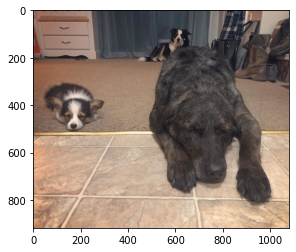

B-2WarMpLYg
GraphVideo
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/93260513_146566680182103_2816141959467039182_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=103&_nc_ohc=2bAr9lPLxYMAX_lEsuM&oh=91ccd83f3ac49c9384e7085cd936e7ed&oe=5E941F68
I Blinked and all of a sudden she’s grown up 😢♥️🐾
.
.
.
.
#corgi #corgistagram #allgrownupnow #puppylove #doggo #corgisofinstagram #corgipuppyinsta #corgipuppy #puppy #dog_features #dogsofinstagram #doglife #doglovers #corgimix #corgimixesofinstagram #auggiesofinstagram #auggiedoggie #corgiaussiemix
1
10130663424
2020-04-11 20:42:21
None


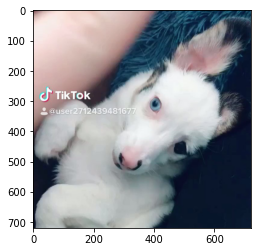

B-2W9oKp6Jv
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/93081120_221389849132429_4966660614995219288_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=rccRvVwhpb4AX91zZVO&oh=bc59d5b2f682b427d32c1502304bfb2b&oe=5EBA788B
Happy Easter frens! 🐰🐇🐣💕
.
.
.
.
#corgi #corgisofinstagram #corgipuppy #corgicardigan #corgilife #corgilove #corgigram #corgidenmark #puppy #puppylove #puppylife #bork #pupper #doggo #dogsofinstagram #dog #welshcorgicardiganpuppy #cardiganwelshcorgisofinstagram #puppiesofinstagram #pup #doge #cardigancorgi  #herdingdogs #myfavcorgi  #corgisofinstagram #easter #happyeaster #easterbunny #bunny
2
31257699444
2020-04-11 20:42:19
Photo by William The Corgo🐺♂️ in Denmark. Image may contain: dog, grass, outdoor and nature


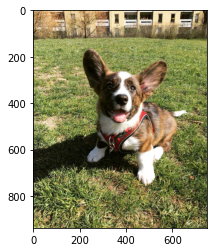

B-2W7WKgLtv
GraphVideo
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/92497979_2825915074189360_7583281301332768047_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=mcuQ9or5UnkAX9NvDwp&oh=f03279f73659e040abee4cd6b8e48f34&oe=5E9455FF
Not to be dramatic but I would die for this dog 😭💕
.
please follow us to see our new video ✨
.
credit @scottyhubs @ceoofhype // scottyhubs (tiktok)
.
#dog #doglovers #dogstagram #chihuahua #chihuahuasofinstagram #cihuahualovers #chihuahuaworld #corgi #corgistagram #lfl #flf #barked #doggo #doggie #dogforlyfe #dogforlove #instagram #animal #tiktokdogs #dogsofinstagram #pugsofinstagram #corgisofinstagram
2
4972371539
2020-04-11 20:42:13
None


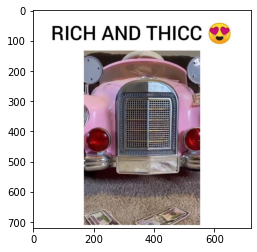

B-2W7WvoDnk
GraphSidecar
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/92773595_2477308949249578_7781926319631759949_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=110&_nc_ohc=veXjBHa2fzsAX_YdeDJ&oh=dcd0882a711e4b6f314a37b283f1898e&oe=5EBBA939
Triumph Herald Coupe
Corgi Toys  1:43
#corgi
#triumph
#diecast
#scalemodels 
#classiccar
#britishcars
0
14834359835
2020-04-11 20:42:01
Photo by car and brochure collector on April 11, 2020. Image may contain: car


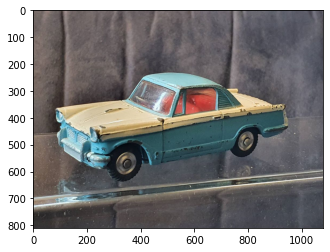

B-2W46hpzQ6
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/92702045_727526027992090_6798189408728412703_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=110&_nc_ohc=bjDv-vjFxzYAX8eCbfZ&oh=d0fe1a5a87900976770de6e0cd9e085f&oe=5EBD6448
New house plants! Eevee approved 👍🌱 #corgi #corgigreenthumb
0
8034483922
2020-04-11 20:41:41
Photo by Eevee Potato 🐾 on April 11, 2020.


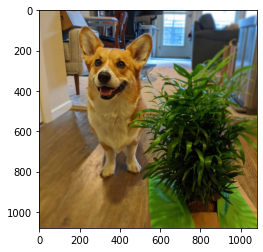

B-2W0I4jc1d
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/93111830_150479469716953_3422169906120482995_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=bx0cUTjIemYAX_gAuR9&oh=e4a1e4e6c7909ef9d843aaf9534f077a&oe=5EBC4E64
For all things IVDD dodgerslist.com  All breeds welcome.  #dachshunds #doxie #frenchbulldog #corgi #minpin #pekingeseofinstagram #beagle #bassethound #shihtzu #ivdd #ivddsurvivor #ivddsupportgroup
1
647491681
2020-04-11 20:41:02
Photo by Linda Stowe on April 11, 2020. Image may contain: possible text that says 'Time to get off the computer Seek immediate vet help Nerve Damage nails scuff floor wobbly walking paw knuckles legs paralyzed bladder control lost Pain yelping shivering/trembling not normal perky self holds leg flamingo like head held high or nose to the ground tight tense tummy reluctant to move arched back Signs of a disc episode odgerslist com'


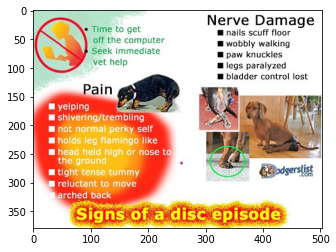

B-2WzE_D86w
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/92639828_181475959490251_8773455446424045393_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=107&_nc_ohc=yxvuvB6Dd8EAX-GRfMw&oh=eb80faa32dc81c6f3a5817512e87134e&oe=5EBA1E49
Got my @corgisforacause hat today! Happy to do my part to help feed our healthcare workers! #corgi #corgisofinstagram #corgilove #corgisforacause
1
50071881
2020-04-11 20:40:53
Photo by Kasey G. on April 11, 2020. Image may contain: 1 person, shoes, dog and outdoor


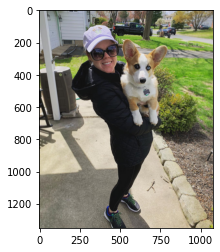

B-2WxvmJ09h
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/93342874_1198990363778601_9185741248093497351_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=109&_nc_ohc=gkrsXQFu5qwAX9ktdEm&oh=64ae7e2a6c9fe2e785629da5c6aa9981&oe=5EBC6585
I said I’m not done walking yet!!! 😡
3
30980100992
2020-04-11 20:40:42
Photo by Maya the Corgi on April 11, 2020. Image may contain: dog and outdoor


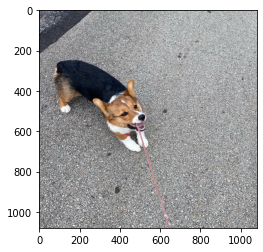

B-2Wsl2hk_H
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/91812136_359718884931844_4925898939344522153_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=EATJPPuLAzEAX9Woz2I&oh=aff070c88531d8a139b39e0933dd7b70&oe=5EB99A42
make sure to get my good side 😌
.
.
.
#yoshi #yoshiba #shibainu #corgi #dogsofinstagram #pdxdogs
1
32331792887
2020-04-11 20:40:00
Photo by Yoshi - Portland, OR on April 11, 2020. Image may contain: dog and outdoor


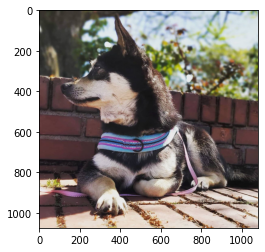

B-2WsIpHTi8
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/92569196_126932188924266_8828483545158650374_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=106&_nc_ohc=9vtWl788m84AX-vFyPq&oh=23d4891352188c1cbfe051ad9ba6cccd&oe=5EBBB6CC
Welcome to my bed 😉🐶
2
26189022211
2020-04-11 20:39:56
Photo by Birks in Brooklyn, New York with @kk9.kr_hy, @koreank9rescue, @koreank9rescue.kr, and @kk9ralumni. Image may contain: dog and indoor


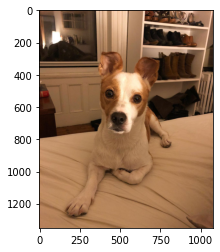

B-2WggHpMG3
GraphVideo
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/93082434_226902545387352_4509028409392096408_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=100&_nc_ohc=ewZ5sK8-lqcAX94A32I&oh=5b5f40aa2bd0265b2e5cc348e155d353&oe=5E94108A
Meeting my new brothers & sisters 🐀
2
31798299028
2020-04-11 20:39:53
None


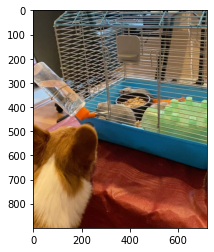

B-2WrLXpH4u
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/93380683_249860426242407_3653935598700830991_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=103&_nc_ohc=DhcfgeCekZMAX9dXVj1&oh=d78255f4168acbf86e94d2cb2ab026d3&oe=5EBB3A2E
I haven’t even brushed his underside...
.
.
.
.
#corgi #pembrokewelshcorgi
4
18066650070
2020-04-11 20:39:48
Photo by Bowie on April 11, 2020. Image may contain: indoor


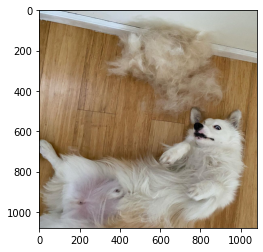

B-2WVg6po7H
GraphVideo
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/92513926_111985120262588_7152128116472631464_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=108&_nc_ohc=tyrxAfqE_h0AX-DO3hJ&oh=721a2366e210206eb2ded3d6cc420f9b&oe=5E946470
#levelupchallenge wiff by furbro #corgi #louiethefluffycorgi #corgisofinstagram #corgis

At one point we didn’t have enough toilet paper so had to use paper towels to substitute😅
2
12247954598
2020-04-11 20:39:26
None


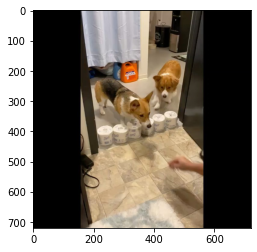

B-2WmlHJMdu
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/92770356_1162710414066399_3686083349524132662_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=103&_nc_ohc=9VonOr88LwoAX_Bzf7J&oh=c34523a6ce6763873da30d6e4d3995a9&oe=5EBB3A1F
Boop 🧡#boopmynose #boopthesnoot #boopsnoot #boop #corgi #spitz #dackel #dackelliebe #dachshund #dachshundsofinstagram #dogsofinstagram #dogstagram #rescuedog #rescuedogsofinstagram #rescuedismyfavoritebreed #rescued #animalphotography #petsofinstagram #petstagram #pawsome #pawfriends #pawstagram
3
31054784095
2020-04-11 20:39:11
Photo by @anton_the_fuzzy on April 11, 2020. Image may contain: dog


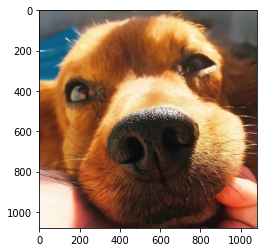

B-2WmQAp4it
GraphSidecar
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/92631892_239973450484826_997905243112503962_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=102&_nc_ohc=pZGVWJ5IvOgAX_pk-or&oh=79a4baf1e47e4ad772d7d0a47c1ad450&oe=5EBC8CA1
I’m not saying that I am the Easter bunny, but I’m not denying it either 🐰🥰 swipe to see my run, my mom says I hop like a bunny! -
-
Bandana: @a_round_of_a_paws -
-
We’re so close to 6k, dm is if you’d like to be apart of my 6k giveaway ❤️❤️
15
22227326427
2020-04-11 20:39:08
Photo shared by Ollie The Auggie on April 11, 2020 tagging @petsmart, @corgis_of_instagram, @weratedogs, @corgitherapy, @a_round_of_a_paws, @corgifeed, @adventuredogsofficial, @albertapaws, @instaaussiefeatures, @dogstagramdog, @petsmartcanada, @adorably, @canadabarks, @the___fluff, @fortheloveofpaw, and @pawsup. Image may contain: dog


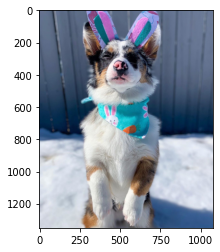

B-2WlQMg_q-
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/92635311_166080411247489_4689355387822456153_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=x-qkEM7XGhMAX-S2SjU&oh=555f9ae8bdc630bda5d56c195d4621b3&oe=5EB9CEC7
3
30606749
2020-04-11 20:39:00
Photo by Loui De Roxas on April 11, 2020. Image may contain: dog


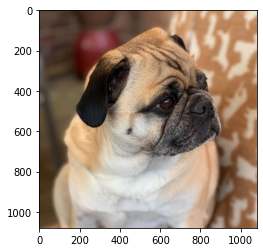

B-2WiD9DUCe
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/92610207_146423550220724_5666441936944441773_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=108&_nc_ohc=bZsjY-uKlxQAX_-x75W&oh=ec4a165620fee9ae1e5e8683d996b72e&oe=5EBC7678
👀
6
1664444035
2020-04-11 20:38:34
Photo by Алина in Erimi. Image may contain: 1 person, dog


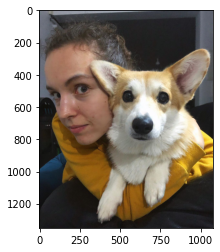

B-2WiAwHCmj
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/93200114_2665884756974348_6251341606386937437_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=108&_nc_ohc=CCQ9k4rQcn0AX9KxTmy&oh=67a4df8afef37f18b2fa75a7e57e7651&oe=5EBAAE69
So excited to be going to my new home! City living...here I come! 🍾

#corgi #corgisofinstagram
0
33404949915
2020-04-11 20:38:33
Photo by Izzy The Corgi on April 11, 2020. Image may contain: dog


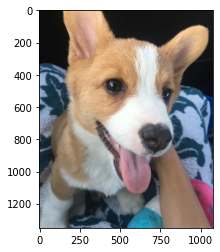

B-2WZaupVsX
GraphVideo
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/92583922_231643794713159_7092675846571446113_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=111&_nc_ohc=CCmA-UjKkRUAX8TYPfB&oh=74ce6eeac0a4942b13c4896928857404&oe=5E94550E
For the people who ask me if I “shed much”. #corgiAF #corgi #corgisofinstagram #corgination
1
4072101452
2020-04-11 20:38:23
None


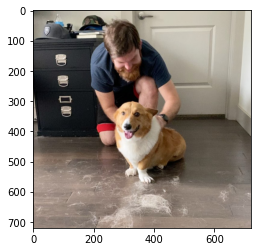

B-2Wf--BJap
GraphSidecar
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/93109470_246971823012790_3509788440164090314_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=110&_nc_ohc=LUC1G9pXXAUAX97nC8-&oh=4820525a26f2f0d1efcf8bb83ffacd77&oe=5EBA6CA7
hyvää pääsiäistä 😄

#corgi
8
10611667824
2020-04-11 20:38:17
Photo by 👻jonnakatriinaa on April 11, 2020. Image may contain: 1 person, fire and outdoor


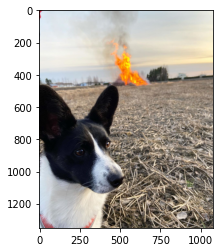

B-2Wc-LpQn0
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/93062016_1067088110335840_7590252515690824190_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=46konMeXMwYAX9dA3z3&oh=2f1711168045efc46141f1530020dd6c&oe=5EBA224D
Life’s ruff but at least mom has fuzzy sweaters
.
.
.
.
#auggie #auggiesofinstagram #corgi #australianshepherd #puppiesofinstagram #cuddlecore #rufflife
0
33000304240
2020-04-11 20:37:52
Photo by Oliver on April 11, 2020.


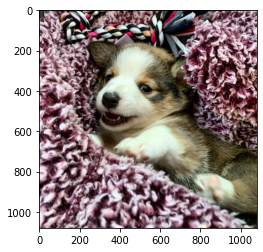

B-2Wcmsp5WQ
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/92555986_114408580224119_6171653222835856633_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=111&_nc_ohc=JEuLIt2pw6sAX_jc5uI&oh=31f054056e697fe06de5b18c210c5870&oe=5EB9C257
Srecan Rodjendan Patricia! 🎂🎉🎁 #corgi #corgisofinstagram #corgioftheday #mojpas #mojljubimac #korgi
2
28082247246
2020-04-11 20:37:49
Photo by Lija Korgic on April 11, 2020. Image may contain: 1 person, dog


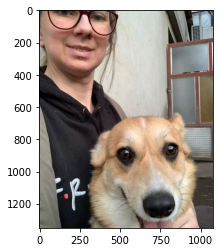

B-2WcIbpb26
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/92827070_166178928176801_9159701304711532926_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=105&_nc_ohc=y8vILspGTSYAX-dBcv-&oh=bb3227e8492f48056ae04ad83684648c&oe=5EBAD9F0
The look mama gives me when she found out I peed on the rug...I secretly was just upset with her for leaving me!!! Payback’s a female dog! 😂😋😉 #corgi #corgisofinstagram #corgination #corgilife #corgilove #seperationanxiety #dogsofinstagram #doglife #introuble #ilovemymama #bratdog #sillypup
0
31715321713
2020-04-11 20:37:45
Photo by Bella Jo on April 11, 2020. Image may contain: 1 person, dog


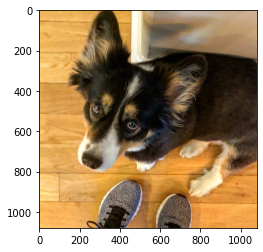

B-2WZcHJ_CN
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/92817480_238318914031006_2107474937324676373_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=110&_nc_ohc=vtF0SPsrsWQAX_UyFBm&oh=89a4e18e66ec84f2cb4bb6f0f01cefb3&oe=5EBD0B9E
Sorry, I’m busy, watching marathons, cutting expenses and so on 🐶 #corgi #corgipuppy #corgilove
2
21883772626
2020-04-11 20:37:23
Photo by Woody on April 11, 2020. Image may contain: indoor


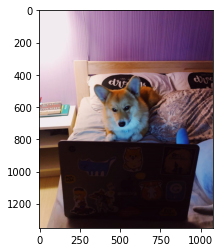

B-2WZVrgN4I
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/93366638_3086804748037894_5866721019834304386_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=110&_nc_ohc=LBjGwi8nkQ8AX_SSZNE&oh=f120039cfea192a447543a38ca026ad4&oe=5EBC8BF0
Wussup buddies,
I’m a Hungarian corgi living my best life with my cool family. This is a throwback pic of me when I arrived to these silly guys. 
#corgi#budapest#hungary#dog#puppy#cool#fun#happy#newinstagram#followｍe#doggo
2
33028421553
2020-04-11 20:37:22
Photo by @savagebonniee on April 11, 2020. Image may contain: dog


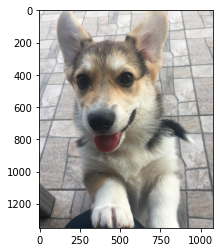

B-2WZOYJGwo
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/92512642_509132196424383_5834709522291007611_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=103&_nc_ohc=yHB_rw76lskAX-mcf9w&oh=fad31f12ffef9a3dc68d078f78db224e&oe=5EBB45B5
Watching the fire fairies 🧚🏻‍♀️ never seen them before #ollie #corgi #winternightfire
0
21669191834
2020-04-11 20:37:21
Photo by Kate Owner Of Ollie on April 11, 2020. Image may contain: outdoor


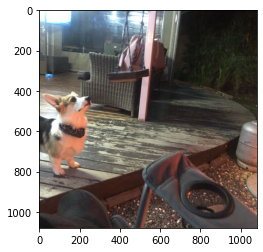

B-2WYyJBiCQ
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/93014351_155725175779201_3732496449497835124_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=YzIhjobJeqsAX87f8Ao&oh=8be50351b87a8bdbf23d912977cb0017&oe=5EBB5E28
No one can find me 👻 
#GobeChan #dogsofinstagram #hideandseek #corgi #mixedbabies #puppiesofinstagram #hongkong
1
23374476308
2020-04-11 20:37:18
Photo by 比高彼 on April 11, 2020. Image may contain: one or more people and people sitting


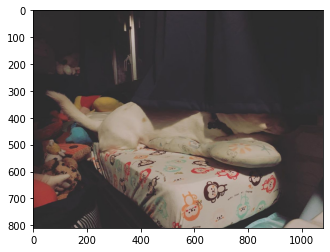

B-2WYucAP6i
GraphSidecar
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/93242315_1610301452459059_752866701567814764_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=107&_nc_ohc=8Iowl9ZZ4uYAX8aQNEl&oh=b0048f8c8f63f4fb361c50c57b0db29a&oe=5EBB5D04
子犬の頃からお散歩は大好き💕でもパパの早歩き🏃‍♂️がいいから、ママのゆっくり🐌お散歩は苦手
#corgi #コーギー #こげん #こげちゃん #子犬の頃と現在 #コギまる創刊号応援隊
0
31963169145
2020-04-11 20:37:17
Photo by Izumi on April 11, 2020. Image may contain: dog and outdoor


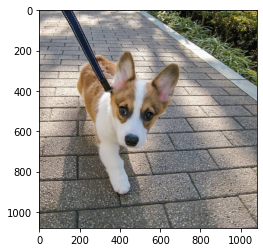

B-2WWnJJmTu
GraphVideo
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/92727597_103313461287674_7945383687922639656_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=102&_nc_ohc=H10vLw3lpPQAX-tAu6q&oh=65c9b0932d647c8c3a61afa0b6ba8b16&oe=5E94691E
Carry me please
.
.
.
.
#fluffy #fluffycorgi #fluffycorgipuppy #puppy #fluffypuppy #cutepuppy #puppyeyes #corgilife #floof #makemesmile #adorable #eyecandy #corgicommunity #corgi #corgipuppy #corgination #corgicorner #corgibums #puppiesofinstagram #pup #puppylove #puppyoftheday #dogsofinstagram #dog #corgibutt #bestpup #corgilove #puppygram #dogoftheday #mydogiscutest
11
25981906465
2020-04-11 20:37:07
None


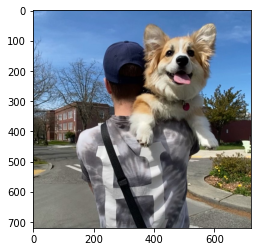

B-2WWbjDhrA
GraphVideo
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/92562474_874993589643381_4117559025414867325_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=109&_nc_ohc=E48LuC2x2tEAX-Jv3DY&oh=d18b21cfc2bb18999c802f9e3dc837b5&oe=5E93FD48
When the world is on lock down but you still gotta get your tan on.
.
.
.
Please like and follow@furgo.friends for more photos and videos
.
.
.
📷: @crumpetandbutter
.
.
.
#dogoftheday #corgis #quarantinelife #corgilove #dogs_of_instagram #doglove #doggy #doglife #dogsofinstagram #dogsofinstaworld #doggo #corgi #dogstagram #doglover #doglovers #dogs #corgigram #corgilife #quarantineandchill #dog #corgicommunity #corgisofinstagram #corgistagram #tanning #corgination #corgiaddict #corgipuppy #quarantine #instadog #cute
7
30899630823
2020-04-11 20:37:04
None


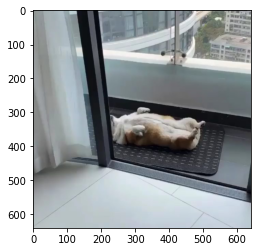

B-2WXLklLCa
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/92566770_263118474821273_5541305810396654766_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=105&_nc_ohc=_6XDw2x2c-4AX9eiBMz&oh=2d48e8480bdf152813ba1e033a4e5f68&oe=5EBB5575
I love you #Murray #corgi #corgisofinstagram #corgiaddict
1
8891473
2020-04-11 20:37:04
Photo by Wylie on April 11, 2020. Image may contain: dog


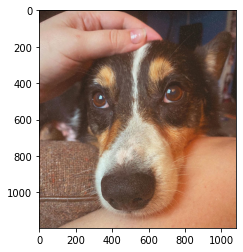

B-2WGvtgBXl
GraphVideo
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/92508491_1045869825789571_6323471055803310405_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=107&_nc_ohc=QEm0elno4lIAX-ay5zq&oh=0a923b86376bb0c5e89247fc29515d60&oe=5E949E3A
#corgi_of_instagram #corgisofinstagram #corgi #corgination #corgipuppy #corgilife #corgilove
1
33223609969
2020-04-11 20:37:00
None


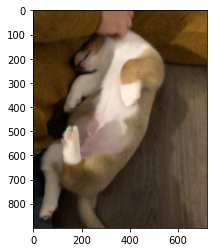

B-2WV6iFw25
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/93006972_106862500871138_7051284660645500055_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=102&_nc_ohc=TJrXMCWLv80AX9ytP9P&oh=9550cc9161afc96d2e5b1665004e112c&oe=5EBAD1DC
I’m a good boy 🐕😍💜💖💕 #corgi #corgisofinstagram #corgistagram #corgipuppy #corgination #corgilife #corgilove #corgicommunity #goodboy #inspiration #instapic #instaphoto #instapuppy #instapet
2
33128743606
2020-04-11 20:36:54
Photo by Mister Milo on April 11, 2020. Image may contain: dog


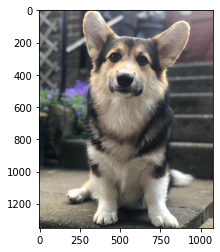

B-2WTMvIv_H
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/93590449_2777401482488527_2932991061330298606_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=107&_nc_ohc=Qs3fHK9tUnYAX-UE3Wx&oh=5193a65db0047d4e689db9d866cf7e8d&oe=5EBC082C
🎼🎼My baby shoot me down 🎼🎼😅#corgicone #corgi #dog #dogofinstagram #corgisofinstagram #corgipuppy #naptime #confinement
5
31295689535
2020-04-11 20:36:32
Photo by Pim’s The French Corgi in Paris, France with @corgillection, and @thecorgi_lovers. Image may contain: dog and indoor


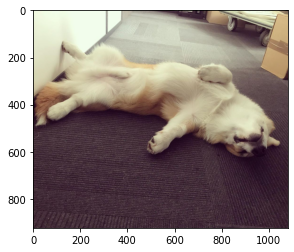

B-2WKgfnKoR
GraphVideo
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/92704639_3102262786472618_4009855830669037925_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=102&_nc_ohc=tg1Q-Fq4gOIAX_4_5Pe&oh=46ec54f48c73f9cc634029c0a29c2171&oe=5E940BFB
#wholesomemes #dankmemes #cancermemes #gamingmemes #gaming #robloxmeme #m #bongocat #bongocats #bongo #hitormiss #bongocatmemes #myheroacademia #corgi #dankmeme #dankhumor #edgymemesforedgyteens #freshmeme #cringememe #meme #memevideo
0
32821755135
2020-04-11 20:36:22
None


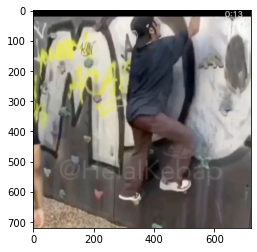

B-2WQzLpOVQ
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/92648331_220174625973757_6612138009102235972_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=_pDxWeTDbBwAX_qSRgD&oh=011398097c074f995bb6bdc6195f3d0c&oe=5EB9FFA2
I love going on car rides with my sister, Mimosa 🐾
10
14015162836
2020-04-11 20:36:12
Photo by Benedict The Corgi on April 11, 2020. Image may contain: dog


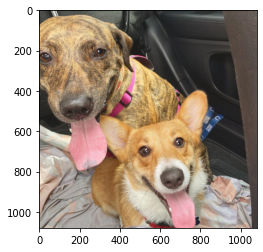

B-2WQktpKYB
GraphSidecar
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/92784160_928082840996977_3068949815897216795_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=50MMhTkJAf0AX9y46_G&oh=ca181f877110856b1c5f6370682e283a&oe=5EBAE8CF
На улице ощутимо меньше стало человеков. Ещё и погода не летная совсем 😳 может оно и к лучшему, отсидеться по домам тоже порой не плохо.
12
8636800426
2020-04-11 20:36:10
Photo by Lucifer Corgi 🔥 on April 11, 2020. Image may contain: dog and outdoor


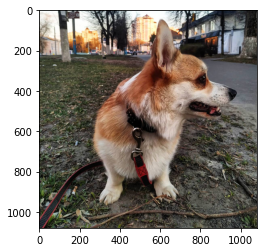

B-2WQQhF0MP
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/92642596_224276675464958_1046854874610166971_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=102&_nc_ohc=VQ1Ep7MTO_gAX8vb0b5&oh=6e4f160a58ea561fd92192fe6a30938d&oe=5EBD072E
15 weeks and already a grey goatee just like my Boss 🤣
•
•
•
•
•
•
•
• #grey#old#boss#what#trip#neveralone#alwaystogether#puppyeyes#pictureoftheday#corgi#leonberger#corgilover#mixbreeddog#bestwoof#instacorgi#corgipuppy#doglover#dogsofinstagram#dog#puppy#puppylife#puppies#kruising#mixbreed#dogs#famous#haarlem#dogssleeping#corgibums @corgibums @corgis.hub @myfavcorgi @leonbergersofinsta @corgisoftheworld @dogsofinstagram @mix_breed_dogs @thedogist @acanapetfood
4
33190665506
2020-04-11 20:36:08
Photo by Ozzy in Haarlem, Netherlands. Image may contain: 1 person, dog


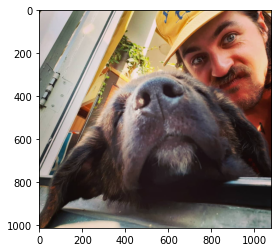

B-2WPV0BZlc
GraphSidecar
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/92951376_263598578140791_597562370908472148_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=103&_nc_ohc=_o3uh05fShcAX_FiMHq&oh=9a836ab7993124cf01ce11890fe39bc5&oe=5EBBB87A
Metsä, Helmi ja mies.
#corgi #welshcorgi #welshcorgicardigan #bluemerle #heterochromia #haapatassun #corgigram #dogsofinstagram
5
35683844
2020-04-11 20:36:00
Photo by Katri on April 11, 2020. Image may contain: dog, tree, grass, outdoor and nature


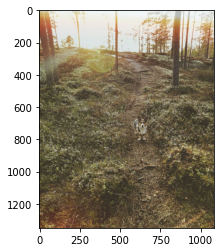

B-2WOQvDJPb
GraphSidecar
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/92444177_254911109234928_5169640941423364551_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=100&_nc_ohc=02H2XZrB-zkAX9Jd0HY&oh=a2633200d986542668d503c967cc74a8&oe=5EBC38AD
Good morning everyone :3 Today I bring you the outfit drawings from the other day :3 I only drew four of them because I was quite annoyed by most of the submissions. Plaid socks? C'mon. Hopefully, I'll get a wave of new followers in the next few days who are a little more active. I honestly find it very frustrating that many of you don't comment. I don't care what it is you comment, if I don't like it i'll just remove it or something

By far, my favorite suggestion was the bikini. I don't know why I didn't draw something like that before, it's simple fun and gets the job done! Enjoy :3 ~
~
~
#furryfandom #furry #furrymusic #furryartist #furryart #anthro #anthropomorphic #gay #yiff #corgi #art #animation #animationmeme #animations

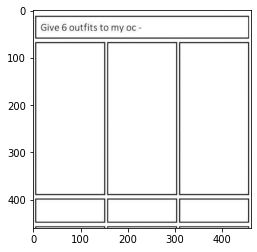

B-2WLZJJbew
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/92727597_525523391479983_2414529068862684938_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=103&_nc_ohc=F-4Rr2ppcMYAX_H9H5N&oh=ef6b23b064ad2f4df39b93f85ed4a3c1&oe=5EBD3D99
Spring has sprung! 🤍💜 #corgi #pnw #pnwonderland
1
8321677535
2020-04-11 20:35:28
Photo shared by Theodore the Corgi on April 11, 2020 tagging @adorable_animals, @corgis_of_instagram, @corgi.love_ig, @corgi.world.official, @adorabledogsclub, and @corgiloverklub. Image may contain: dog, outdoor and nature


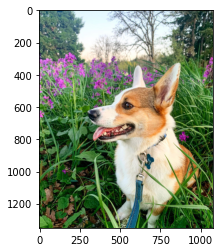

B-2WFGPHvXH
GraphVideo
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/93189888_221860905824497_6413162706036577170_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=TDeV_gHkRrwAX_S34go&oh=7749049f900dad534b09eab39fdc5fe9&oe=5E948214
#dog#corgi#happypuppy#corgisofinstagram#moscow#russia#corgipuppy#instalike#friends#likeforlike#srlfi#beautiful#собакадругчеловека#длясемьи#любовь#улица#коргипемброк
4
260496006
2020-04-11 20:35:25
None


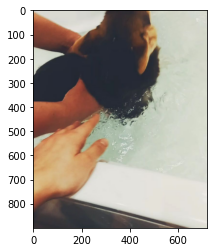

B-2WJ2spZbf
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/93050660_286083109048181_1049181022585314940_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=105&_nc_ohc=FeSANnJzR6gAX-kKBtU&oh=c7bee940a275b61f1c7ba50beef6f60f&oe=5EB9F13A
Пионер готов, всегда готов... поглащать вкусности и бежать за мячиком 😍

#corgistagram #корги #коржик #petofinstagram #pembrokewelshcorgi #corgioftheday #собака #corgi #коргипемброк #вельшкорги #welshcorgi #welsh_corgi #corgipembroke #myfavcorgi #corgicommunity #corgisofig #corgigram #corgiplanet #dogsofinstagram #corgination #corgiworld #corgirules #corgilife #dogsofinstagram #dog #bestdog #corgilove #corgimania #corgilife #corgigram #коргироссии
5
33044464455
2020-04-11 20:35:15
Photo by Джерри - коржиная жопка 🍑 in Парк Им А.Н. Островского. Image may contain: 1 person, dog and outdoor


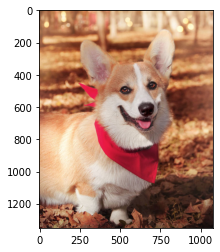

B-2WJH3FtB_
GraphVideo
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/92640739_220949142558912_2194911854442240130_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=100&_nc_ohc=RAS2OFkT-MUAX_9YUqk&oh=bb31651884a4cc5a515b860b056cbf3f&oe=5E94A34C
Loki's got his priorities straight
.
Cr - @tofu_corgi .
.
#tomhiddleston #twhiddleston #hiddleston #lokilaufeyson #lokiodinson #loki #lokiofasgard #lokigodofmischief #ragnarok #marveluniverse #mavel #marvelmemes #marvelfan #marvelfandom #marvelcomics #memes #infinitywar #corgi #dog
79
7956159642
2020-04-11 20:35:15
None


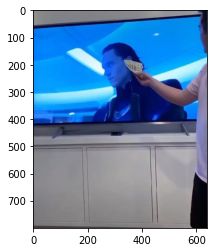

B-2WI8xl2Ri
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/92843823_524050618222611_1277715500859848745_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=103&_nc_ohc=WldsRjTRYyMAX_LBMwC&oh=7f08cc4d34837f2a04da29d922867576&oe=5EBC74DB
Just going to lay here and be lazy.

#lazyday #corgi #corgisofinstagram #
0
7556274442
2020-04-11 20:35:08
Photo by Kyle Campbell in Temple, Texas. Image may contain: indoor


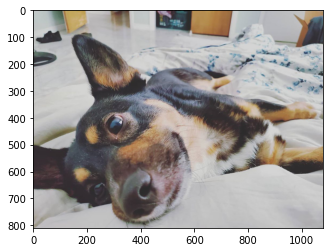

B-2WIS8J-7m
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/92550327_1937036293096105_7174834100905343876_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=miiz_4XOMawAX9K0pMu&oh=80d0001c2c11155ea4fbeb079e229086&oe=5EBAB687
*After one too many trips to the pantry for quarantine snacky snacks*
.
.
Happens to the best of us.
.
#corgisofinstagram #corgipuppy #happydoggo #puppylife #puppiesofinstagram #doglovers #dogphotography #corgi #pembrokewelshcorgi #tricolorcorgi #petportrait #covid #shelterinplace #quarantineandchill #sleepydoggo
3
24815742031
2020-04-11 20:35:02
Photo by Oliver on April 11, 2020. Image may contain: dog


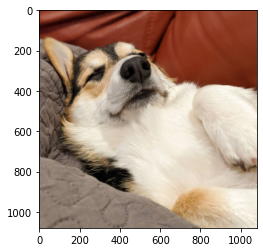

B-2WF6bJLxA
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/92440957_215301693133926_2676648783120101221_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=106&_nc_ohc=138iqjalHaMAX8M7yW4&oh=2969d56997801eb2ed28b0ccb12530c2&oe=5EBCAA9C
Cutest eyelashes  #dogsofinstagram #dog #doglife #doglover #cuteanimals #adoptdontshop #rescuedogsofinstagram #rescuedog #bigears #dogears #개스타그램 #귀염둥이 #멍스타그램 #shibamix #corgimix #chihuahuamix #jindomix #서울 #ohio #usa #korea #chihuahua #jindo #shiba #shibainu #corgi #seoul #cutedogs #dailyfluff #eyelashes
2
28460971174
2020-04-11 20:34:43
Photo by Teddy on April 11, 2020. Image may contain: dog


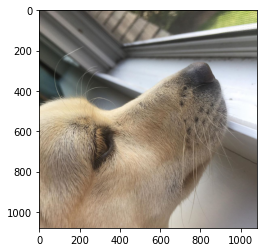

B-2WEi9JERK
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/92667504_1648941801924125_278591568312897091_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=105&_nc_ohc=D13j37KYVhYAX-wQfFL&oh=04e59c7fbdbcccab4fa0741fe43dec5a&oe=5EB99B64
#corgi #corgigirl #stayhome #dog #pet #pets #plsfollow #love #lovemyhuman #garden #staysafe #quarantine #corgipet #corgidog #corgilovers #model #green
8
32161064263
2020-04-11 20:34:32
Photo by 𝙁𝙤𝙭𝙞 in My Garden. Image may contain: 1 person, dog, outdoor and nature


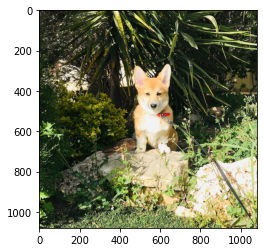

B-2WDj6pr1q
GraphSidecar
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/92642362_512433146100201_7102530298628045000_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=109&_nc_ohc=atF4PBPIJ4cAX93AWds&oh=2686eddd4f0b2301f999e8cf44afe4ed&oe=5EBCFA3B
The pawrents took us on our first hike today! We had so much fun exploring and getting muddy! 🌳😁 #corgi #Aussiecorgimix #hiking #saturdayvibes #dogsofinstagram
8
8622996916
2020-04-11 20:34:24
Photo by Daisy & Astro on April 11, 2020. Image may contain: dog and outdoor


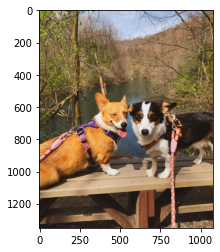

B-2WA7SgRRd
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/93242316_627502381432681_6990426981845525417_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=BkFnRiZMxrsAX-PqMcV&oh=facf3ee9b9ec0967dda78578f25db9c9&oe=5EB9A19A
🐶 + 🍗+🍗+🍗+🍗= 🦊
.
.
.
#drumsticks #foxy #nubs #layingdown #corgi #corgisofinstagram #corgipuppy #corgilife #corgination #corgilove #corgis #pembrokewelshcorgi #pembroke #puppy #puppylove #puppiesofinstagram #pup #puppylife #pupstagram
6
13218089373
2020-04-11 20:34:02
Photo by Ketchup the Corgi in Passaic, New Jersey. Image may contain: 1 person, indoor


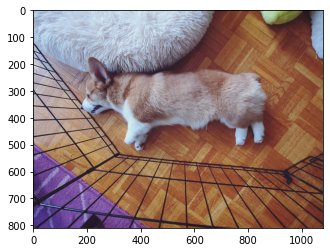

B-2WAFVJsGI
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/92542018_268037170892511_452048335077740866_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=103&_nc_ohc=d3vD66lbdSoAX94yaFo&oh=9492b6ddef23158482e1c883520391b5&oe=5EB994FA
Being a puppy is exhausting 😴🐾
•
•
•
#corgi #corgisofinstagram #corgipuppy #corgination #corgilife #dogsofinstagram #dogs #weratedogs
4
32432292725
2020-04-11 20:33:55
Photo shared by JUNE 🌈 on April 11, 2020 tagging @dogsofinstagram, @weratedogs, @stlpetpics, and @stldogmoms. Image may contain: dog and indoor


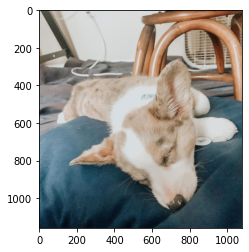

B-2WAESgeia
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/92547125_1345672192283075_8809586941296101274_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=111&_nc_ohc=xPD1b5Q9NoIAX8-IpJz&oh=fde7a19736f9161a6ad4c2f02865484d&oe=5EBD4B27
Apéro confiné ! #corgi#chienconfiné#restezchezvous#apero
0
26471841309
2020-04-11 20:33:55
Photo by Orsonwelshcorgi on April 11, 2020. Image may contain: dog and indoor


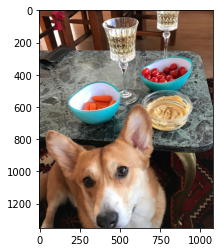

B-2V-vWoOmy
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/92461910_161315575342886_1226473477124594992_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=102&_nc_ohc=rzOADCg3RmIAX_NdZx-&oh=c26468097748196c7026eba5b48173ee&oe=5EBB9B55
Dinky Toys England VW Volkswagen 1300 PTT Swiss Post with opening parts and jewelled headlights 1966  #Modellauto #modelcar #diecast #Oldtimer #dinkytoys #corgitoys #Spielzeug #toys #vintage #dinky #corgi #youngtimer #teknotoys #Politoys #Mercury #mebetoys #Solido #matchbox  #Märklin #siku #juets #toycar #vw #Volkswagen #post #ptt #switzerland 
#majorette #hotwheels #stayathome
2
21428568366
2020-04-11 20:33:44
Photo by Vintage Diecast Dreams on April 11, 2020. Image may contain: car


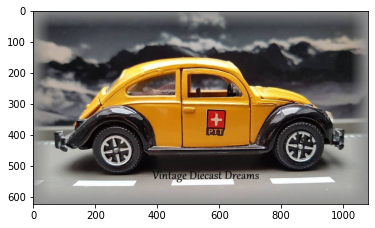

B-2V9QJJLK0
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/92566273_130084408585807_106102318730898706_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=107&_nc_ohc=Vey-Br4oRJgAX_5y9Kc&oh=403e0385193d3ca0f16d4a7fc0fd0115&oe=5EBBEBBD
From our family to yours. 🐣 🐣 🐣 
#happyeaster #corgieasterbunny #corgi #corgisofinstagram
0
23585641049
2020-04-11 20:33:32
Photo by Samwise Corgi on April 11, 2020.


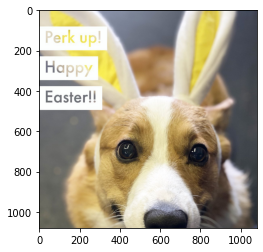

B-2V7ENhzpJ
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/92220160_855406558283662_8832517872513321026_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=110&_nc_ohc=VSC_GXxOf8sAX8XO_jC&oh=e74736d698b9c262be9568f1765380c5&oe=5EBB0907
Call me professor hank #corgi #corgisofinstagram #corgination #corgipuppy #hank #puppy #smart #corgilove
0
32999645403
2020-04-11 20:33:14
Photo by @corgi_named_hank on April 11, 2020. Image may contain: 1 person, dog


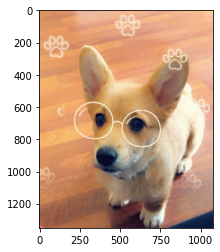

B-2V5-4pmhy
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/93216602_226753971765760_1642270518550945948_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=sfdTRpcstd8AX_L05Bv&oh=d71e2dcfa2380234ab789afd5e4d713c&oe=5EBA3090
Lucky, it's easy to stay away from people in nature 👌🏻 .
.
.
.
.
.
.
#rileythecorgi #corgisandkeeshonds #corgi #corgis #corgisofinstagram #pembrokewelshcorgi #pembrokecorgi #petstagram #petsofinstagram #dogstagram #dogsofinstagram #kelownabc #petphotography #britishcolumbia #corgigram
4
13306790269
2020-04-11 20:33:05
Photo by 🌟 Riley and Pippin 🌟 in Kelowna, British Columbia. Image may contain: dog and outdoor


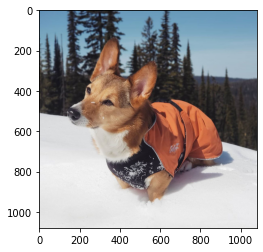

B-2V4B6pGYh
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/92844869_2890931677665161_4141069624877015894_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=105&_nc_ohc=zWZdQ8PiYjsAX-lAssI&oh=558f90d0006543ed248d58a29bb77e9b&oe=5EBC85BB
What?! 🐶 #lycheethecorgigirl #corgi #corgipuppy #corgioftheday #corgilover #柯基 #柯基日常 #柯基荔枝
0
8255720464
2020-04-11 20:32:49
Photo by Lychee D. on April 11, 2020. Image may contain: dog


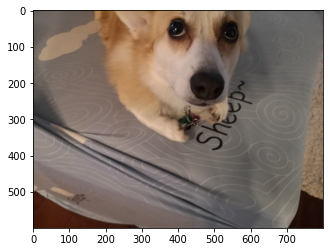

B-2V3qiJGHN
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/92574708_151073246311819_7961321621260255255_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=107&_nc_ohc=UZEY1FDFQRQAX8obdYS&oh=56c4685b39a5548caa883fb189928ca9&oe=5EB9CDA7
Selfies with Stu! 😍🥰 #stubbie_the_corgi #corgi #pembrokewelshcorgi
6
1830479866
2020-04-11 20:32:46
Photo by Joni L. on April 11, 2020. Image may contain: dog, sky and outdoor


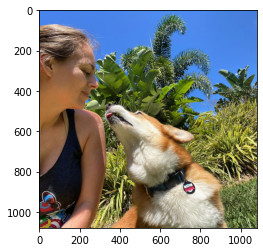

B-2Va66pBVB
GraphVideo
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/92511894_513267522700016_3842096908332053923_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=108&_nc_ohc=Mx9k9ql3RMYAX_fUk3N&oh=e89ed40ad9add0855dec5ccff34a8bfd&oe=5E947FD6
Not a fan of the hiccups 😒
3
31269821084
2020-04-11 20:32:32
None


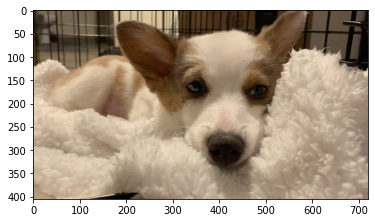

B-2V1elJsxj
GraphSidecar
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/93245744_225937051990054_2374202970955030489_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=110&_nc_ohc=xXG1RYPk-D0AX_gWoBh&oh=c3647c29cd375296d106d1cd9733f57b&oe=5EBA4717
He wanted to graze on grass like a horse he had seen, ok cool. Graze away.
We stand for a bit & when I say it’s time to go he locks down, he’s not moving. I let go & say BYE 👋🏼 Still nothing. 
I say I’M GONNA GO EAT & he hauls ass back to me 🤦🏼‍♀️🐶 #pembrokewelshcorgi #corgisofinstagram #corgigram #corgistagram #corgi #corgination #corgilife #corgilove #corgination #corgicommunity #instacorgi #dogmomlife #dogmom #dogmomsofinstagram #dogmomproblems
2
2254271944
2020-04-11 20:32:28
Photo by ѕєℓιиå 👸🏻 åçħιℓℓє$ 🐶 on April 11, 2020. Image may contain: 1 person, grass, sky, dog, tree, plant, outdoor and nature


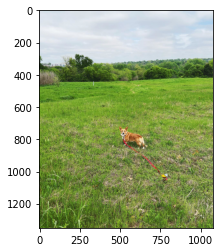

B-2V0xWD9H8
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/92953325_2537388866513078_8236912928859421014_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=102&_nc_ohc=84FuyOZcq2cAX8nGpGv&oh=0b69c44fe71f437a4663692cfd5f885c&oe=5EBD758A
On fait bien la paire 😋
#jackrussell #jrt #jackrussellterrier #corgi #dogs #dogsofinstagram #jackrussellsofinstagram #buddies #corgisofinstagram
4
4139102203
2020-04-11 20:32:23
Photo by liam on April 11, 2020. Image may contain: dog and indoor


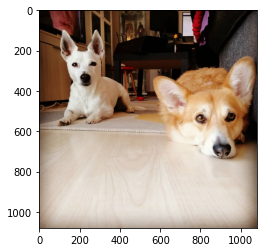

B-2V0OLJ9TE
GraphImage
https://instagram.fdnk1-2.fna.fbcdn.net/v/t51.2885-15/e35/92692706_1104312536597850_2425127751545150740_n.jpg?_nc_ht=instagram.fdnk1-2.fna.fbcdn.net&_nc_cat=106&_nc_ohc=9O-qQEnCxHMAX9qzT5M&oh=5ca7c48c33403fefce7b5f98466f75b5&oe=5EBD4796
Saturday snuggles with the adorable @thebluemerlegirl 😍 #Ivy #notourdog
4
32304661899
2020-04-11 20:32:18
Photo shared by Not Our Dog on April 11, 2020 tagging @thebluemerlegirl. Image may contain: dog


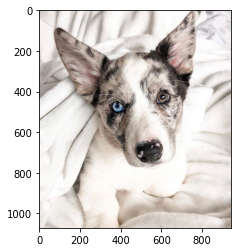

B-2N4K6gFGn
GraphImage
https://instagram.fdnk1-1.fna.fbcdn.net/v/t51.2885-15/e35/93061268_515510089124901_3202665809365331548_n.jpg?_nc_ht=instagram.fdnk1-1.fna.fbcdn.net&_nc_cat=109&_nc_ohc=RYkGpSmdwjcAX9BOX9U&oh=5113762c643bb4d4ca432b6a2a7d2bbb&oe=5EBCE1A0
Y'know what? I'd love to see an actual corgi do that kinda stunt!

#dog #dogs #puppy #puppylove #doglover #dogsofinstagram #dogstagram #photooftheday #photography #photoshoot #sheltie #samoyed #corgi #maltese #goldenretriever #husky #jackrussellterrier #dachshund #dalmatian #pomeranian #havanese #instagram #instafollow #instalike #instadog #followme #followers #followformore #likeit #likeforlikes
68
1227395834
2020-04-11 19:22:56
Photo by Michael McCartney Wind on April 11, 2020. Image may contain: dog, possible text that says 'So, get your knees flexin', and your arms T-rexin'...'


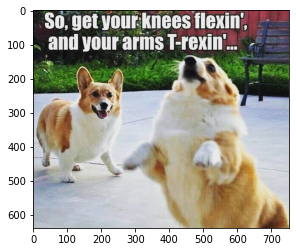

In [74]:
response = json.loads(text)
response = AttrDict(response)

has_next_page = response.graphql.hashtag.edge_hashtag_to_media.page_info.has_next_page
end_cursor = response.graphql.hashtag.edge_hashtag_to_media.page_info.end_cursor
# next_url = 
for node in response.graphql.hashtag.edge_hashtag_to_media.edges:
    print(node.node["shortcode"])
    print(node.node["__typename"])
    print(node.node["display_url"])
    
    if len(node.node["edge_media_to_caption"]["edges"]) > 0:
        print(node.node["edge_media_to_caption"]["edges"][0]["node"]["text"])
    print(node.node["edge_liked_by"]["count"])
    print(node.node["owner"]["id"])
    print(datetime.fromtimestamp(node.node["taken_at_timestamp"]))
    print(node.node["accessibility_caption"])
    
    r = requests.get(node.node["display_url"])
    i = Image.open(BytesIO(r.content))
    plt.imshow(i)
    plt.show()